In [23]:
from aicsimageio import AICSImage
from tifffile import imsave
from pathlib import Path
import numpy as np
from skimage.filters import threshold_otsu
from skimage.morphology import ball, binary_closing, remove_small_objects, dilation, erosion, disk
from aicssegmentation.core.pre_processing_utils import  intensity_normalization, edge_preserving_smoothing_3d
from aicssegmentation.core.vessel import vesselness3D
from aicssegmentation.core.seg_dot import dot_2d
from aicssegmentation.core.utils import topology_preserving_thinning, hole_filling
import matplotlib.pyplot as plt
from itkwidgets import view   
from aicssegmentation.core.visual import seg_fluo_side_by_side,  single_fluorescent_view, segmentation_quick_view
plt.rcParams["figure.figsize"] = [16, 12]
from aicssegmentation.core.MO_threshold import MO

# dots
from aicssegmentation.core.seg_dot import dot_3d, dot_3d_wrapper 
from aicssegmentation.core.pre_processing_utils import intensity_normalization, image_smoothing_gaussian_slice_by_slice
from skimage.morphology import remove_small_objects, watershed, dilation, erosion, ball     # function for post-processing (size filter)
from skimage.feature import peak_local_max
from skimage.measure import label
from skimage import transform as sktrans
from skimage import io as skio
from scipy.ndimage import distance_transform_edt

# lamp1
from aicssegmentation.core.vessel import filament_2d_wrapper
from aicssegmentation.core.seg_dot import dot_2d_slice_by_slice_wrapper
from aicssegmentation.core.utils import hole_filling
from aicssegmentation.core.pre_processing_utils import intensity_normalization, image_smoothing_gaussian_slice_by_slice
from skimage.morphology import remove_small_objects, watershed, dilation, erosion, ball  
import warnings
warnings.filterwarnings('ignore')

#shell
from aicssegmentation.core.utils import get_middle_frame, hole_filling, get_3dseed_from_mid_frame
from aicssegmentation.core.pre_processing_utils import intensity_normalization, image_smoothing_gaussian_3d

from skimage import filters as skfilters
import numpy as np
import matplotlib.pyplot as plt
from aicsimageio import AICSImage
from skimage import filters as skfilters

In [13]:
filename = r"\\allen\aics\assay-dev\users\Sandi\mFISH\work-080823\DAPI-instseg-080823\DAPI_003_006_bc_cp_masks.tif"
reader = AICSImage(filename) 
IMG = reader.data.astype(np.uint16)
IMG = IMG.squeeze()

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 0


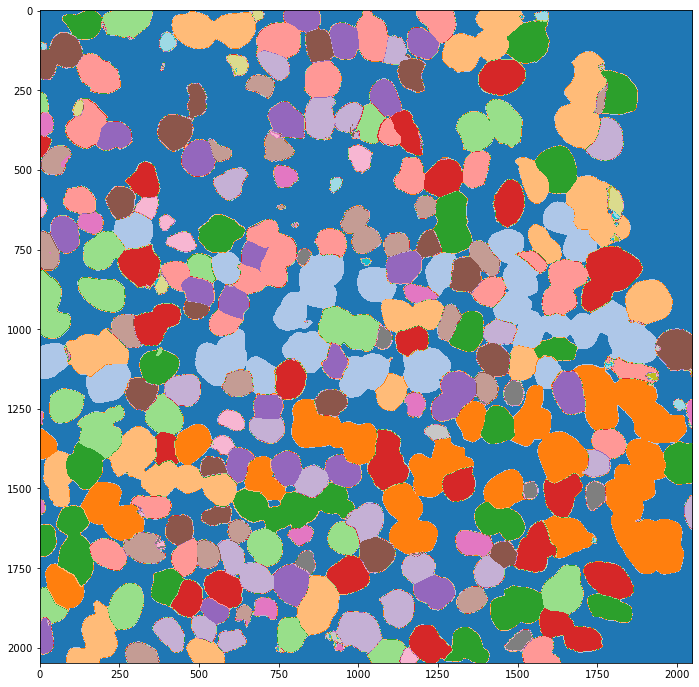

In [14]:
plt.imshow(IMG.max(axis=0), cmap="tab20")

In [39]:
len(np.unique(IMG))

509

In [47]:
# img = sktrans.rescale(IMG, (0.5,0.1,0.1), order=0)
img = IMG[::3,::20,::20]
print(img.shape)

(17, 103, 103)


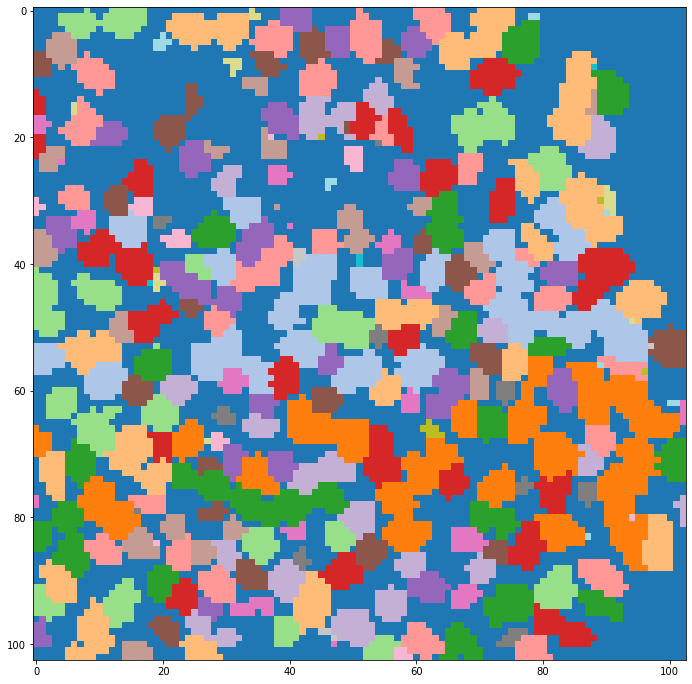

In [48]:
plt.imshow(img.max(axis=0), cmap="tab20")

In [31]:
path = r"\\allen\aics\assay-dev\users\Sandi\mFISH\work-080823\DAPI-instseg-080823\DAPI_003_006_bc_cp_masks_small.tif"
skio.imsave(path, img)

In [49]:
zb, yb, xb = np.where(img==0)
print(len(zb))

111416


In [50]:
zn, yn, xn = np.where(img!=0)
print(len(zn))

68937


In [34]:
from tifffile import imsave

imsave("DAPI_003_006_bc_cp_masks_small.tif", img) 